In [116]:
import pickle as pkl 

import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [2]:
with open('artist_features.pkl', 'rb') as f:
    artist_features = pkl.load(f)

In [3]:
# focus on rates to start rather than song length
X = artist_features.drop(columns=['lines', 'words', 'syllables'])
X

,Lyrical/Misc,Bragging/Combative,Money/Party,Romance/Sex,words_per_line,unique_words,unique_word_rate,syllables_per_line,syllables_per_word
artist,,,,,,,,,
03 Greedo,0.012388,0.040464,0.021360,0.011842,35.125816,185.375000,0.070810,9.211347,0.261876
070 Shake,0.015179,0.001804,0.021861,0.036665,30.507007,137.470588,0.071274,8.091570,0.264949
2 Chainz,0.018329,0.023071,0.021967,0.006407,32.916186,194.111111,0.090778,8.641371,0.262462
2 Pistols,0.013755,0.030431,0.018532,0.021855,28.376804,178.272727,0.085574,7.243027,0.255224
21 Savage,0.007464,0.046448,0.046098,0.008801,33.424155,189.095238,0.070440,8.484020,0.253769
...,...,...,...,...,...,...,...,...,...
Zebra Katz,0.025077,0.012421,0.018921,0.016527,25.122420,132.944444,0.087163,6.521429,0.259716
Zelooperz,0.018682,0.037817,0.003213,0.006282,29.884914,151.060606,0.095839,7.746176,0.258715
Zion I,0.031290,0.000425,0.003131,0.006091,34.300381,210.200000,0.104322,8.986945,0.262015


In [9]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)


In [10]:
X_scaled

,Lyrical/Misc,Bragging/Combative,Money/Party,Romance/Sex,words_per_line,unique_words,unique_word_rate,syllables_per_line,syllables_per_word
artist,,,,,,,,,
03 Greedo,-1.108094,1.115106,0.780540,-0.227123,0.514503,-0.344285,-1.123740,0.482583,-0.244783
070 Shake,-0.834664,-1.035582,0.819309,1.803736,-0.442401,-1.017869,-1.090486,-0.394098,0.285492
2 Chainz,-0.526146,0.147511,0.827469,-0.671790,0.056722,-0.221446,0.307881,0.036345,-0.143757
2 Pistols,-0.974242,0.556940,0.561764,0.592036,-0.883727,-0.444150,-0.065240,-1.058428,-1.392879
21 Savage,-1.590426,1.447984,2.694137,-0.475869,0.161960,-0.291975,-1.150268,-0.086846,-1.644092
...,...,...,...,...,...,...,...,...,...
Zebra Katz,0.134856,-0.444954,0.591835,0.156195,-1.557956,-1.081511,0.048671,-1.623372,-0.617658
Zelooperz,-0.491603,0.967847,-0.623256,-0.681979,-0.571284,-0.826780,0.670745,-0.664509,-0.790359
Zion I,0.743504,-1.112303,-0.629578,-0.697615,0.343493,0.004780,1.278952,0.306897,-0.220902


In [11]:
clusters = 5
km = KMeans(n_clusters=clusters, random_state=77, n_init=3)
km.fit(X_scaled)

KMeans(n_clusters=5, n_init=3, random_state=77)

In [16]:
X_labeled = X.copy()
X_labeled['cluster'] = km.labels_
X_labeled

,Lyrical/Misc,Bragging/Combative,Money/Party,Romance/Sex,words_per_line,unique_words,unique_word_rate,syllables_per_line,syllables_per_word,cluster
artist,,,,,,,,,,
03 Greedo,0.012388,0.040464,0.021360,0.011842,35.125816,185.375000,0.070810,9.211347,0.261876,2
070 Shake,0.015179,0.001804,0.021861,0.036665,30.507007,137.470588,0.071274,8.091570,0.264949,4
2 Chainz,0.018329,0.023071,0.021967,0.006407,32.916186,194.111111,0.090778,8.641371,0.262462,2
2 Pistols,0.013755,0.030431,0.018532,0.021855,28.376804,178.272727,0.085574,7.243027,0.255224,2
21 Savage,0.007464,0.046448,0.046098,0.008801,33.424155,189.095238,0.070440,8.484020,0.253769,0
...,...,...,...,...,...,...,...,...,...,...
Zebra Katz,0.025077,0.012421,0.018921,0.016527,25.122420,132.944444,0.087163,6.521429,0.259716,4
Zelooperz,0.018682,0.037817,0.003213,0.006282,29.884914,151.060606,0.095839,7.746176,0.258715,2
Zion I,0.031290,0.000425,0.003131,0.006091,34.300381,210.200000,0.104322,8.986945,0.262015,3


In [41]:
X_labeled.groupby('cluster').count()

,Lyrical/Misc,Bragging/Combative,Money/Party,Romance/Sex,words_per_line,unique_words,unique_word_rate,syllables_per_line,syllables_per_word
cluster,,,,,,,,,
0,122,122,122,122,122,122,122,122,122
1,217,217,217,217,217,217,217,217,217
2,277,277,277,277,277,277,277,277,277
3,401,401,401,401,401,401,401,401,401
4,243,243,243,243,243,243,243,243,243


In [13]:
list(X_labeled.reset_index()[X_labeled.reset_index()['cluster'] == 4]['artist'])[0:20]

NameError: name 'X_labeled' is not defined

#### Notes: 
#### k=5:
Cluster 0 has 122, Cluster 3 has 401, rest around 2-300
* 0: Count: 122 -- Money/Party dominated, average words/line, 2nd lowest unique word usage, average syllables per line, lowest syllables per word 
* 1: Count: 217 -- Lyrical/Misc dominated, mild Bragging/Combative, highest words/line, highest unique words/rate, highest syllables per line and word
* 2: Count: 277 -- Bragging/Combative Dominated, average everything
* 3: Count: 401 -- Lyrical/Misc dominated, mild Bragging/Combative AND Romance/Sex, average words/line, above average unique word rate, average syllables per line/word
* 4: Count: 243 -- Romance/Sex dominated, mild Lyrical/Misc, lowest words/line by far, lowest unique words/rate, lowest syllables/line, but average per word

Example artists in Each Cluster:
* 0: Cardi B/Nicki Minaj/Megan Thee Stallion, Roddy Ricch, Travis Scott, Young Thug, XXXTentacion
* 1: Aesop Rock, Eminem, Ghostface Killah, J. Cole, Lil Wayne
* 2: 2 Chainz, 50 Cent, DMX, Snoop Dogg, Wiz Khalifa
* 3: Andre 3000, Chance the Rapper, Childish Gambino, Kendrick Lamar, Lupe Fiasco, Macklemore
* 4: Chris Brown, Jason Derulo, Kid Cudi, Lauryn Hill, Post Malone, The Weeknd

Cluster Analysis: 
* 0: Hard to interpret. Chiefly generic money/party semantic content, most simplistic word usage. Seems to house most of the trap/'vibe'/mumble rappers. Some artists don't seem very accurately placed (e.g. Cardi/Nicki/Megan). 
* 1: Clearly home to most 'lyrical' rappers. Dominant cluster in terms of vocabulary and syllable density.
* 2: Very non-descript, middle of the pack by every metric. Seems to house a lot of older, 'standard' flow rappers.
* 3: Seems to capture most 'musically' oriented rappers -- lyrical diversity but not massive density, widest variety of topics.
* 4: Effectively captures most R&B artists. Romance/Sex oriented lyrics with minimal lyrical diversity.

In [112]:
class Cluster():

    def __init__(self, data, scaler, n_clusters, n_init, cluster):
        self.data = data.copy()
        self.scaler = scaler()
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.cluster = cluster(n_clusters=self.n_clusters, random_state=77, n_init=self.n_init)
        self.cluster_counts_ = None
        self.centroids_ = None
        self.inertia_ = None

    def scale(self):
        self.data = pd.DataFrame(self.scaler.fit_transform(self.data), columns=self.data.columns, index=self.data.index)

    def fit(self):
        self.cluster.fit(self.data)
        self.data['cluster'] = self.cluster.labels_
        self.cluster_counts_ = self.data.groupby('cluster').count().iloc[:,0]
        self.centroids_ = self.cluster.cluster_centers_
        self.inertia_ = self.cluster.inertia_

    # def labels_(self):

In [113]:
test = Cluster(X, StandardScaler, 5, 3, KMeans)

In [114]:
test.scale()
test.fit()

In [115]:
test.cluster_counts_

cluster
0    122
1    217
2    277
3    401
4    243
Name: Lyrical/Misc, dtype: int64

In [84]:
test.inertia_

6217.407430933533

In [134]:
# test different sizes of K to plot inertia
def kmeans_scree_plot(data, scaler, min_k, max_k, n_iter):
    cluster = Cluster(data, scaler, min_k, n_iter, KMeans)
    n_clusters = [i for i in range(min_k,max_k+1)]    
    inertias = []
    cluster.scale()
    data = cluster.data
    for k in n_clusters:
        cluster = Cluster(data, scaler, k, n_iter, KMeans)
        cluster.fit()
        inertias.append(cluster.inertia_)
    plt.plot(n_clusters, inertias)
    print(list(zip(n_clusters, inertias)))

[(1, 11339.999999999995), (2, 8614.935817990692), (3, 7331.596649107567), (4, 6706.899426784931), (5, 6214.874937951342), (6, 5840.953491987842), (7, 5559.502866760166), (8, 5320.678783523608), (9, 5101.243093356314), (10, 4933.883314182881), (11, 4774.095989141835), (12, 4631.5356525948055), (13, 4483.546130619044), (14, 4386.907144179993), (15, 4274.258909785878), (16, 4172.932674590118), (17, 4079.41095828764), (18, 3993.685470226637), (19, 3928.460942792269), (20, 3853.8055212686886), (21, 3794.5422758937784), (22, 3743.1758529489825), (23, 3682.636851107108), (24, 3634.5868625389016), (25, 3569.9979365253616), (26, 3525.3481391385885), (27, 3488.460420697032), (28, 3441.828583305377), (29, 3411.523404539594), (30, 3356.094963840744)]


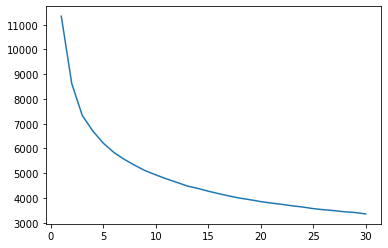

In [139]:
kmeans_scree_plot(X, StandardScaler, 1, 30, 30)